# Semana 7 Clase 1

Correlación de Spearman

La correlación de Spearman evalúa la fuerza y dirección de la relación monótona (creciente o decreciente) entre dos variables numéricas u ordinales.
A diferencia de Pearson, no requiere que los datos sean normales ni que la relación sea lineal.

Spearman convierte los valores de las variables en rangos (posiciones ordenadas) y calcula la correlación entre esos rangos.

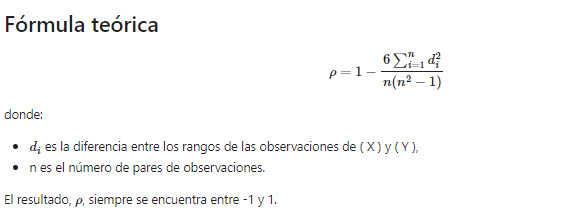

Correlación no paramétrica de Spearman

Cuando los datos no cumplen el supuesto de normalidad, no es adecuado usar la correlación de Pearson, ya que esta se basa en distribuciones normales y relaciones lineales.

En estos casos, se recomienda aplicar la correlación de Spearman, también conocida como Rho de Spearman (ρ).

Correlación vs Causalidad

La correlación mide qué tan relacionadas están dos variables:
es decir, si cambian juntas y en qué dirección lo hacen.

Si una variable aumenta cuando la otra aumenta, la correlación es positiva.
Si una aumenta mientras la otra disminuye, la correlación es negativa.
Si no hay relación, la correlación es nula.

Ejemplo:
Cuando aumenta la concentración de ozono (O₃), también aumenta la de PM10.
→ Existe una correlación positiva, pero eso no significa que una cause a la otra.


La causalidad implica que un cambio en una variable provoca un cambio en otra.
Es decir, existe una relación de causa y efecto.


Ejemplo:
Encender una estufa causa un aumento en la temperatura.
Aquí sí hay causalidad, porque una acción genera directamente el cambio.

In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/contam2022.csv"

In [5]:
contam = pd.read_csv(ruta, parse_dates = True, index_col=0)
contam.head()

,Centro Ozono,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,Centro PM10
Fecha,,,,,
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000


In [6]:
contam.corr(method='pearson') # Coeficiente de correlación lineal "Pearson"

,Centro Ozono,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,Centro PM10
Centro Ozono,1.000000,0.101920,0.142250,-0.003331,0.481932
Centro diÛxido de azufre,0.101920,1.000000,0.310672,0.180158,0.456039
Centro diÛxido de nitrÛgeno,0.142250,0.310672,1.000000,0.844692,0.626440
Centro monÛxido de carbono,-0.003331,0.180158,0.844692,1.000000,0.559163
Centro PM10,0.481932,0.456039,0.626440,0.559163,1.000000


In [7]:
corr_spearman= contam.corr(method='spearman')

In [8]:
corr_spearman

,Centro Ozono,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,Centro PM10
Centro Ozono,1.000000,0.197253,0.181516,0.051342,0.481537
Centro diÛxido de azufre,0.197253,1.000000,0.416420,0.296297,0.585443
Centro diÛxido de nitrÛgeno,0.181516,0.416420,1.000000,0.847467,0.643303
Centro monÛxido de carbono,0.051342,0.296297,0.847467,1.000000,0.571305
Centro PM10,0.481537,0.585443,0.643303,0.571305,1.000000


**Gráfica de correlación**

In [9]:
import seaborn as sns #gráficas más profesionales de manera muy sencilla.

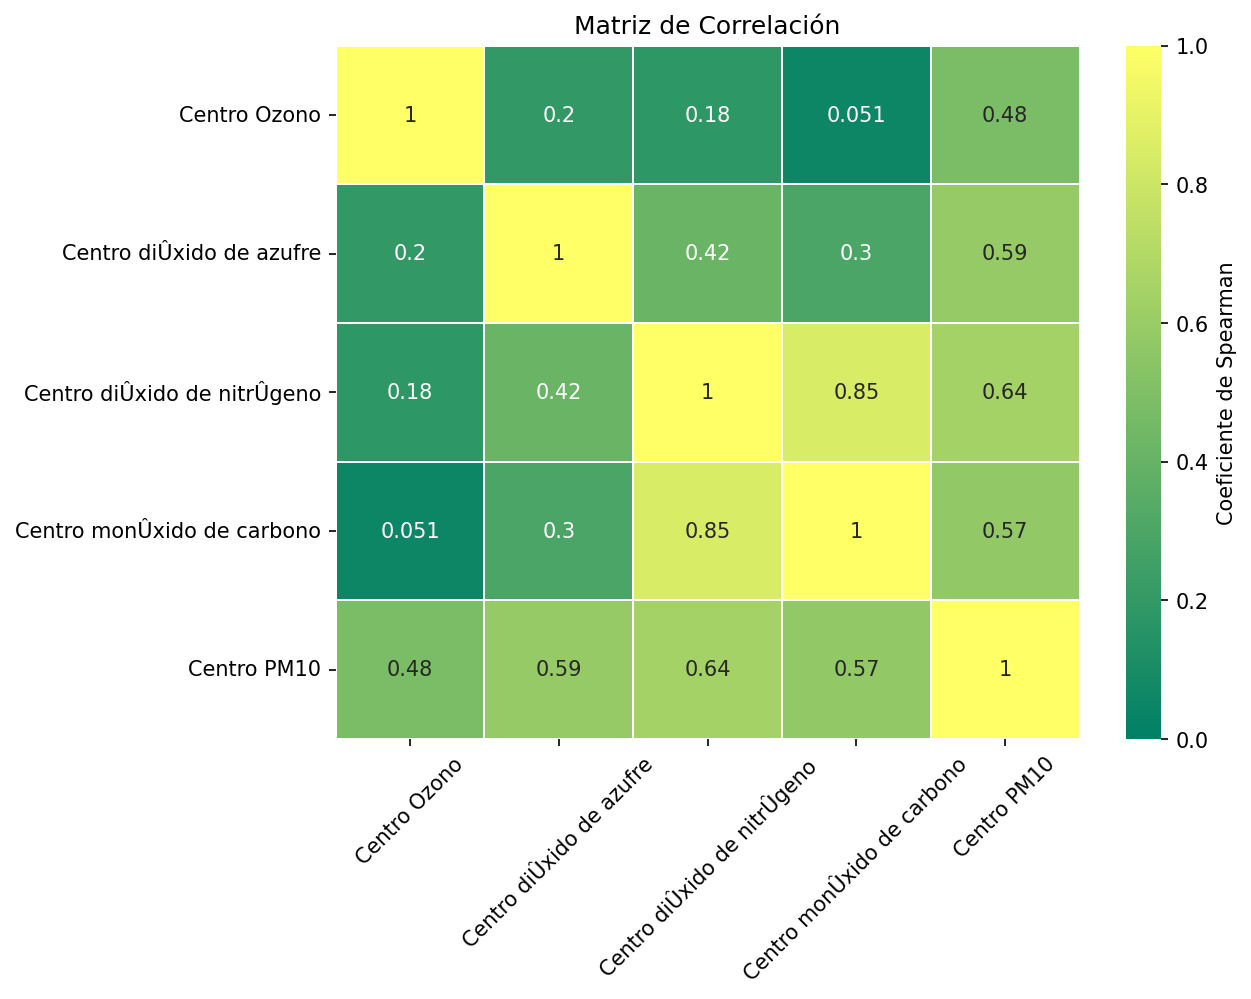

In [10]:
# Crear una figura de tamaño 8x6 pulgadas con una resolución de 150 dpi (puntos por pulgada)
plt.figure(figsize=(8, 6), dpi=150)

# Crear el mapa de calor (heatmap) de la matriz de correlación de Spearman
sns.heatmap(
    corr_spearman,   # Matriz de correlación (resultado de contaminantes.corr(method='spearman'))
    annot=True,      # Muestra los valores numéricos de la correlación dentro de cada celda
    cmap='summer',   # Define la paleta de colores ('summer' = tonos verdes y amarillos) https://seaborn.pydata.org/generated/seaborn.pairplot.html
    linewidths=0.2,  # Grosor de las líneas que separan las celdas del mapa
    cbar_kws={'label': 'Coeficiente de Spearman'},  # Etiqueta de la barra de color (colorbar)
    vmin=0, vmax=1, center=0.5   # Rango de colores: mínimo=0, máximo=1, centrado en 0.5
)
# Añade un título al gráfico
plt.title('Matriz de Correlación', fontsize=12)
# Rota las etiquetas del eje X para que se lean mejor
plt.xticks(rotation=45)
# Muestra el gráfico en pantalla
plt.show()

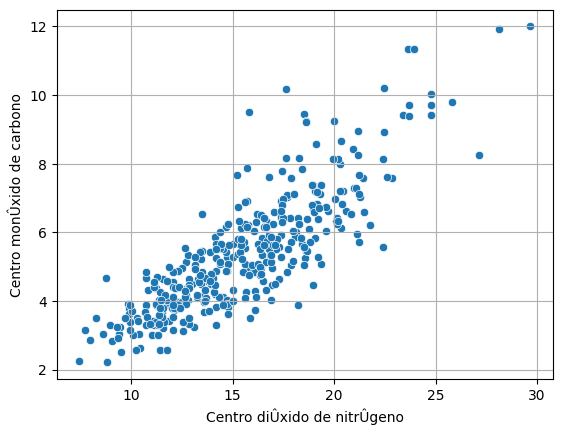

In [12]:
sns.scatterplot(
    data=contam,                  # DataFrame que contiene las variables a graficar
    x='Centro diÛxido de nitrÛgeno',        # Variable en el eje X
    y='Centro monÛxido de carbono'          # Variable en el eje Y
)

# Agregar una cuadrícula al gráfico para facilitar la lectura visual
plt.grid(True)

# Mostrar el gráfico en pantalla
plt.show()

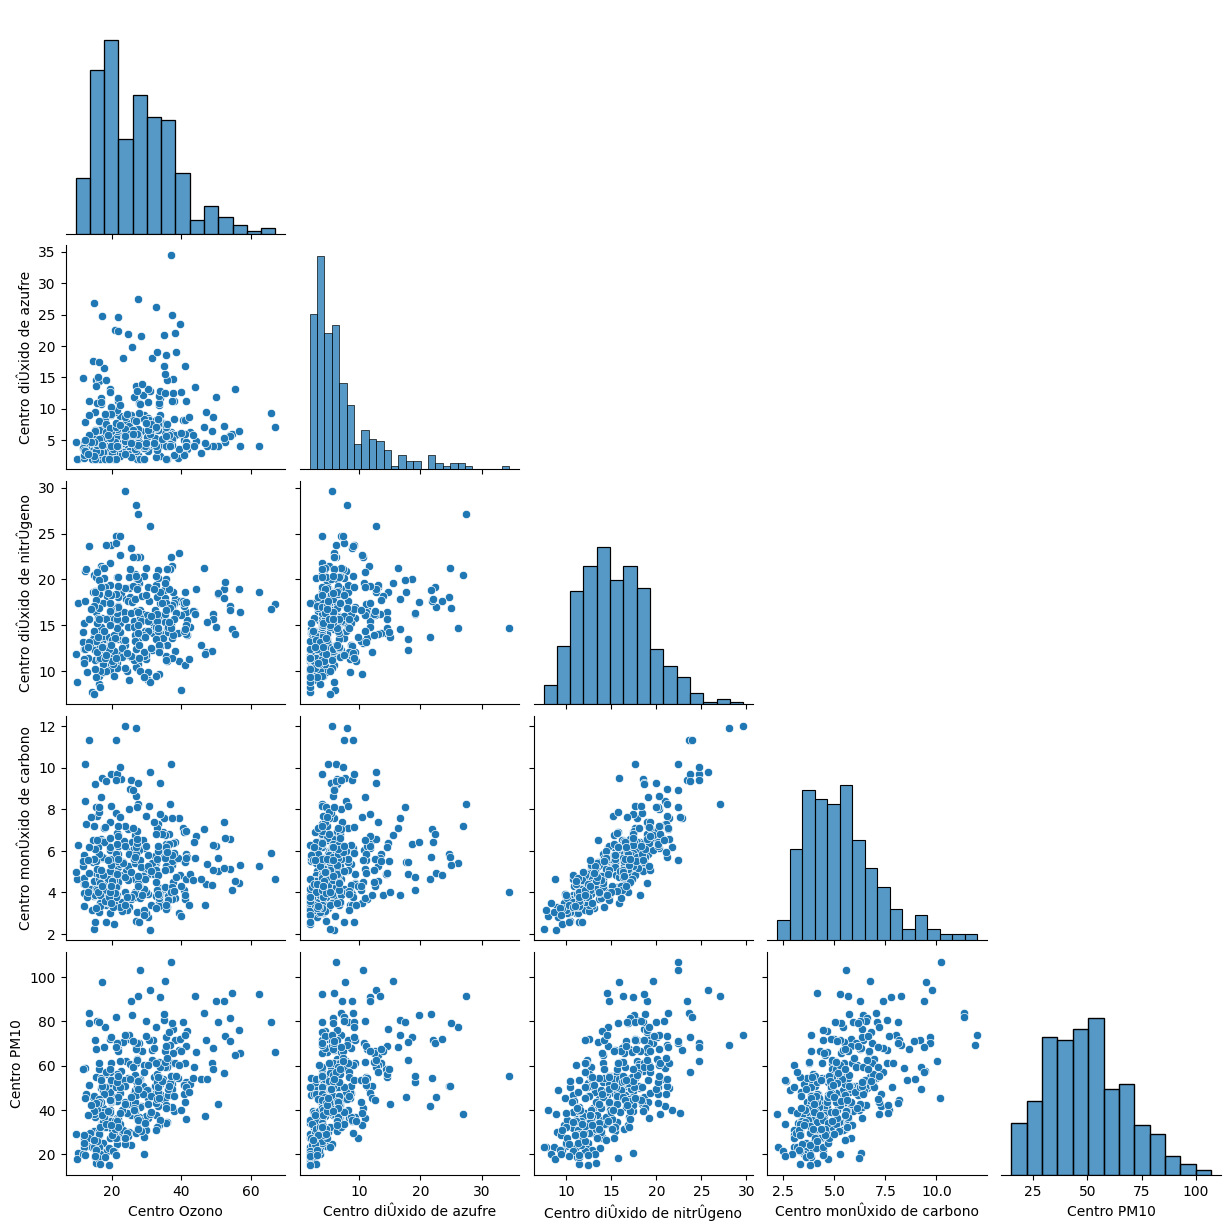

In [13]:
sns.pairplot(contam,corner=True) #Crea una matriz de diagramas de dispersión con todas las combinaciones posibles de variables numéricas dentro del DataFrame contam.
plt.show()

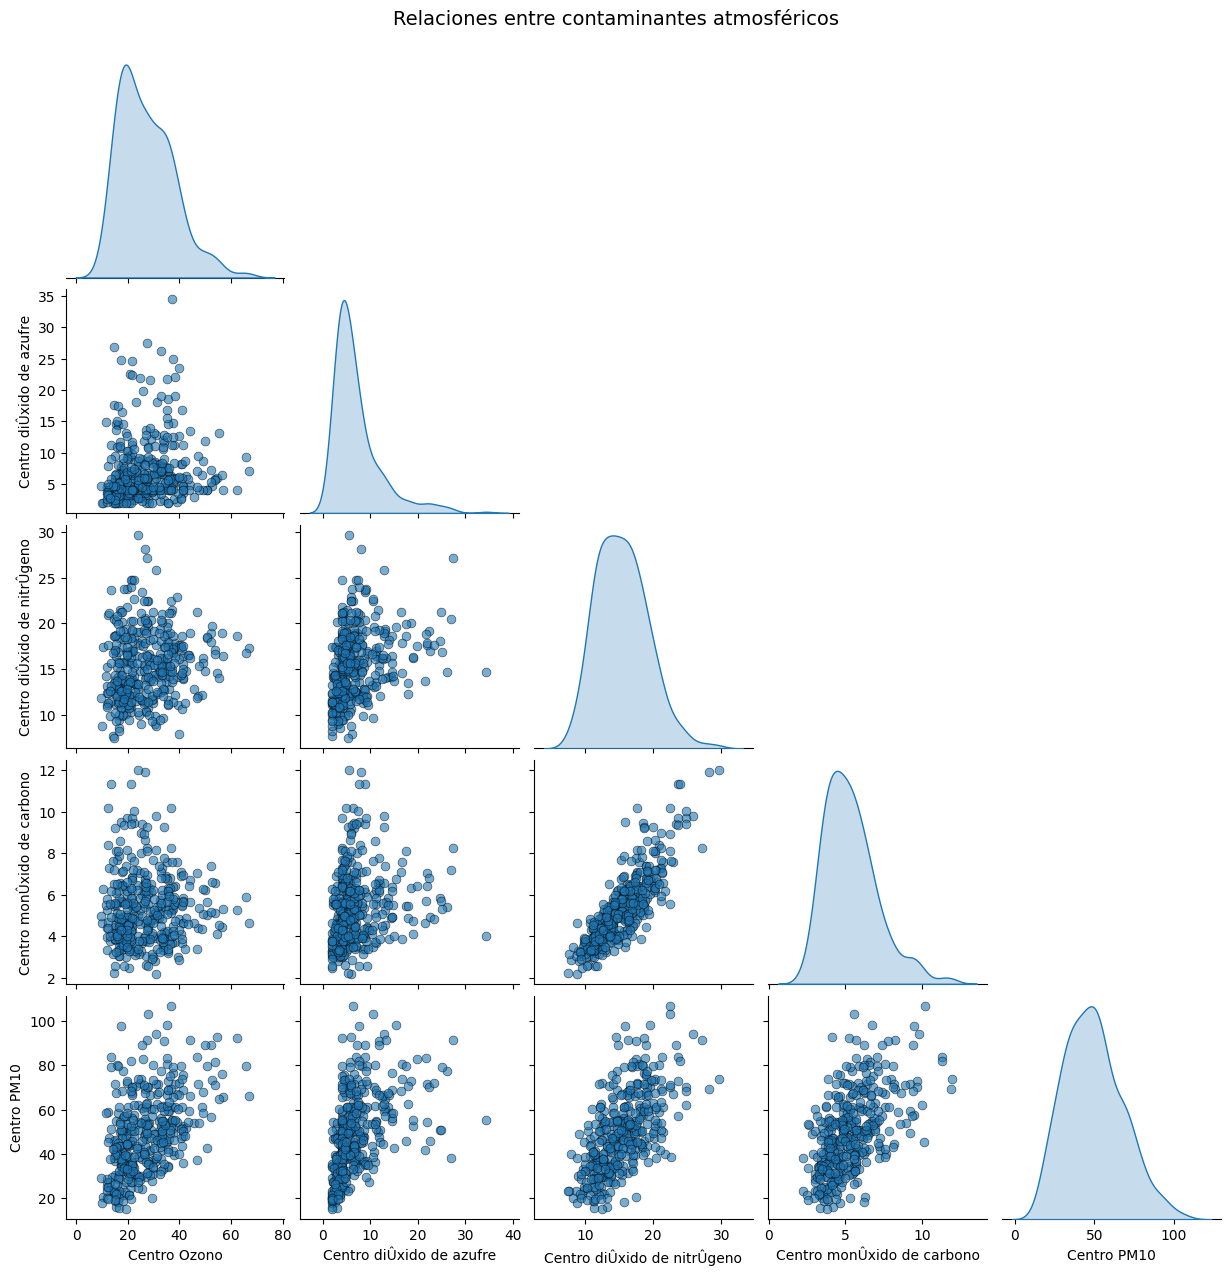

In [14]:
# Crear una matriz de diagramas de dispersión (pairplot)
sns.pairplot(
    data=contam,
    corner=True,                # Muestra solo la mitad inferior
    diag_kind='kde',            # Usa curvas de densidad en lugar de histogramas en la diagonal
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},  # Ajustes estéticos de los puntos

)

# Agregar un título general a la figura
plt.suptitle("Relaciones entre contaminantes atmosféricos", fontsize=14, y=1.02)
plt.show()

In [15]:
import sys
!{sys.executable} -m pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.2 MB/s eta 0:00:00


In [16]:
import pingouin as pg

In [18]:
corr = pg.pairwise_corr(contam, method='spearman')
corr.round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Centro Ozono,Centro diÛxido de azufre,spearman,two-sided,365,0.197,"[0.1, 0.29]",0.000,0.968
1,Centro Ozono,Centro diÛxido de nitrÛgeno,spearman,two-sided,365,0.182,"[0.08, 0.28]",0.000,0.938
2,Centro Ozono,Centro monÛxido de carbono,spearman,two-sided,365,0.051,"[-0.05, 0.15]",0.328,0.165
3,Centro Ozono,Centro PM10,spearman,two-sided,365,0.482,"[0.4, 0.56]",0.000,1.000
4,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,spearman,two-sided,365,0.416,"[0.33, 0.5]",0.000,1.000
5,Centro diÛxido de azufre,Centro monÛxido de carbono,spearman,two-sided,365,0.296,"[0.2, 0.39]",0.000,1.000
6,Centro diÛxido de azufre,Centro PM10,spearman,two-sided,365,0.585,"[0.51, 0.65]",0.000,1.000
7,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,spearman,two-sided,365,0.847,"[0.82, 0.87]",0.000,1.000
8,Centro diÛxido de nitrÛgeno,Centro PM10,spearman,two-sided,365,0.643,"[0.58, 0.7]",0.000,1.000
9,Centro monÛxido de carbono,Centro PM10,spearman,two-sided,365,0.571,"[0.5, 0.64]",0.000,1.000


In [19]:
corr.sort_values(by=['r'], ascending=False)[['X','Y','r']].round(3)

,X,Y,r
7,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,0.847
8,Centro diÛxido de nitrÛgeno,Centro PM10,0.643
6,Centro diÛxido de azufre,Centro PM10,0.585
9,Centro monÛxido de carbono,Centro PM10,0.571
3,Centro Ozono,Centro PM10,0.482
4,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,0.416
5,Centro diÛxido de azufre,Centro monÛxido de carbono,0.296
0,Centro Ozono,Centro diÛxido de azufre,0.197
1,Centro Ozono,Centro diÛxido de nitrÛgeno,0.182
2,Centro Ozono,Centro monÛxido de carbono,0.051


# Notas
scatterplot: puntos para ver relaciones

lineplot: líneas para tendencias

barplot: barras para comparar categorías

histplot: distribución de datos

boxplot: cajas para ver rangos y valores atípicos

heatmap: mapas de calor para matrices

Principales operaciones con la librería Pingouin

Tipo de análisis	Función de Pingouin	Propósito / Qué calcula	Sintaxis básica
Correlación	pg.corr()

Calcula la correlación entre dos variables (Pearson, Spearman, Kendall).	pg.corr(x=df['var1'], y=df['var2'], method='spearman')


Matriz de correlación	pg.rcorr()	Muestra una matriz completa de correlaciones entre todas las variables numéricas.	pg.rcorr(df)

Prueba de normalidad	pg.normality()

Evalúa si las variables siguen una distribución normal (Shapiro–Wilk).	pg.normality(df)

t-test (comparación de medias)	pg.ttest()	Compara las medias de dos grupos (independientes o pareados).	pg.ttest(x=grupo1, y=grupo2, paired=False)

ANOVA	pg.anova()	Analiza si hay diferencias significativas entre tres o más grupos.	pg.anova(data=df, dv='variable', between='grupo')

Medida de efecto	pg.compute_effsize()	Calcula el tamaño del efecto (Cohen’s d, Hedges’ g, Glass’s Δ).	pg.compute_effsize(x=grupo1, y=grupo2, eftype='cohen')

Regresión lineal	pg.linear_regression()	Ajusta un modelo de regresión lineal simple o múltiple.	pg.linear_regression(df[['x1','x2']], df['y'])
Chi-cuadrado	pg.chi2_independence()
Evalúa la independencia entre dos variables categóricas.	pg.chi2_independence(data=df, x='var1', y='var2')

Test de homogeneidad de varianzas	pg.homoscedasticity()	Verifica si los grupos tienen varianzas iguales (Levene o Bartlett).	pg.homoscedasticity(data=df, dv='var', group='grupo')

Prueba de homogeneidad multivariante	pg.box_m()	Evalúa la igualdad de matrices de covarianza entre grupos.	pg.box_m(data=df, dv=['x1','x2'], group='grupo')

Correlación parcial	pg.partial_corr()	Calcula la correlación entre dos variables controlando por una tercera.	pg.partial_corr(data=df, x='var1', y='var2', covar='var3')

Test no paramétrico (Wilcoxon)	pg.wilcoxon()	Compara dos muestras relacionadas sin asumir normalidad.	pg.wilcoxon(x=grupo1, y=grupo2)

Estadísticos descriptivos	pg.describe()

Calcula media, desviación, curtosis, asimetría y otros estadísticos básicos.	pg.describe(df)

Intervalos de confianza	pg.compute_bootci()	Calcula intervalos de confianza mediante remuestreo bootstrap.	pg.compute_bootci(data=df['var'], func='mean')